## WSL Wave Score Analysis

##### In this notebook the scores that were collected from the wsl web scraper notebook are read in and analyzed. The three main library that will be used to do the analysis and visualization are pandas, numpy, and matplotlib. 

##### From the analysis I hope to uncover whether being selective in the choice of waves or catching as many as possible is more benefial for individual surfers. I also hope to learn if individuals become more or less selective as they progress through the contest, if they are influenced by who they are surfing against, or if location may play a role in there selection.


#### By: Connor Secen

In [1]:
# all required imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from mpl_toolkits.mplot3d import axes3d
import operator

The first step of the analysis process is to read in the file created by the scraper notebook. The head and tail of this csv file is displayed below.

In [2]:
file = './combined_csv.csv'
df1 = pd.read_csv(file)   # read in the file and store in a pandas dataframe named df1
display(df1.head(6))
display(df1.tail(6))
df2 = df1.copy()

,Year,Name,Event,Round,Scores
0,2016,I. Ferreira,Quiksilver Pro Gold Coast,Round 1,"['5.17', '3.33', '6.83', '1.70', '1.10', '2.27..."
1,2016,R. Callinan,Quiksilver Pro Gold Coast,Round 1,"['4.83', '3.80', '6.27', '4.83', '\xa0', '\xa0..."
2,2016,K. Asing,Quiksilver Pro Gold Coast,Round 1,"['2.67', '2.17', '1.67', '0.27', '2.77', '4.80..."
3,2016,M. Bourez,Quiksilver Pro Gold Coast,Round 1,"['4.50', '3.67', '4.43', '1.70', '2.27', '7.00..."
4,2016,A. Melling,Quiksilver Pro Gold Coast,Round 1,"['2.67', '0.37', '0.37', '5.50', '4.87', '\xa0..."
5,2016,J. Wilson,Quiksilver Pro Gold Coast,Round 1,"['0.23', '2.33', '0.47', '1.40', '1.83', '3.73..."


,Year,Name,Event,Round,Scores
3690,2018,G. Medina,Billabong Pipe Masters,Semifinals,"['7.17', '6.33', '9.10', '\xa0']"
3691,2018,J. Smith,Billabong Pipe Masters,Semifinals,"['7.33', '8.50', '0.10', '7.27']"
3692,2018,J. Wilson,Billabong Pipe Masters,Semifinals,"['1.23', '8.77', '2.77', '5.43', '0.50', '\xa0..."
3693,2018,K. Slater,Billabong Pipe Masters,Semifinals,"['3.33', '0.20', '6.90', '1.80', '4.27', '0.17..."
3694,2018,G. Medina,Billabong Pipe Masters,Finals,"['8.43', '6.17', '7.60', '8.77', '9.57', '6.10..."
3695,2018,J. Wilson,Billabong Pipe Masters,Finals,"['3.17', '0.60', '7.93', '8.77', '0.57', '0.50..."


The next step is to clean the data. Because of the way the data was formatted on the wsl website, some scores in the surfers list of scores for a specific heat are represented as '/xa0', which can be seen above. These values need to be removed from the list of scores in order to easily determine the number of waves caught in a heat.

To account for this, a new column will be added called Raw-Scores, which will hold what is currently in the scores column and the Scores column will hold an updated list of only scored waves, converted to ints.

Also, because I am already looping through all the rows, I will add another 2 columns called Wave-Count and Avg.-Score, to make analysis easier.

In [3]:
df2['Raw-Scores'] = np.empty((len(df2), 0)).tolist()   # add new column to df2 with preset value of empty list
df2['Wave-Count'] = 0   # add new column to df2 with preset value of 0
df2['Avg.-Score'] = 0.0   # add new column to df2 with preset value of 0.0

for i, row in df2.iterrows():
    rawScores = row['Scores']
    rawScores = eval(rawScores)   # collect the current value and convert to a list of strings
    stringScores = [x for x in rawScores if x != '\xa0']   # remove all \xa0 values from the list
    stringScores = [x for x in stringScores if x != 'TBD']   # remove all TBD values from the list
    
    # in some instances foot note numbers were collected. This removes these additional numbers
    for i2, x2 in enumerate(stringScores):
        if ' ' in x2:   # check if space in string indicating foot note
            space = x2.find(' ')   # find index of space
            x2 = x2[:space]   # remove end of string starting at space
            stringScores[i2] = x2
    
    scores = list(map(float, stringScores))   # convert all values to floats
    
    # calculate the average wave score for the heat
    totalScore = 0
    for s in scores:
        totalScore += s
    if totalScore == 0:
        avgScore = 0.0
    else:
        avgScore = totalScore/len(scores)
    
    # add new values to the dataframe
    df2.at[i,'Scores'] = scores
    df2.at[i,'Raw-Scores'] = rawScores
    df2.at[i,'Wave-Count'] = len(scores)
    df2.at[i,'Avg.-Score'] = round(avgScore,2)
    
display(df2.head(6))
display(df2.tail(6))

,Year,Name,Event,Round,Scores,Raw-Scores,Wave-Count,Avg.-Score
0,2016,I. Ferreira,Quiksilver Pro Gold Coast,Round 1,"[5.17, 3.33, 6.83, 1.7, 1.1, 2.27, 4.77, 2.9]","[5.17, 3.33, 6.83, 1.70, 1.10, 2.27, 4.77, 2.90]",8,3.51
1,2016,R. Callinan,Quiksilver Pro Gold Coast,Round 1,"[4.83, 3.8, 6.27, 4.83]","[4.83, 3.80, 6.27, 4.83, , , , ]",4,4.93
2,2016,K. Asing,Quiksilver Pro Gold Coast,Round 1,"[2.67, 2.17, 1.67, 0.27, 2.77, 4.8, 4.0]","[2.67, 2.17, 1.67, 0.27, 2.77, 4.80, 4.00, ]",7,2.62
3,2016,M. Bourez,Quiksilver Pro Gold Coast,Round 1,"[4.5, 3.67, 4.43, 1.7, 2.27, 7.0]","[4.50, 3.67, 4.43, 1.70, 2.27, 7.00, ]",6,3.93
4,2016,A. Melling,Quiksilver Pro Gold Coast,Round 1,"[2.67, 0.37, 0.37, 5.5, 4.87]","[2.67, 0.37, 0.37, 5.50, 4.87, , ]",5,2.76
5,2016,J. Wilson,Quiksilver Pro Gold Coast,Round 1,"[0.23, 2.33, 0.47, 1.4, 1.83, 3.73, 0.63]","[0.23, 2.33, 0.47, 1.40, 1.83, 3.73, 0.63]",7,1.52


,Year,Name,Event,Round,Scores,Raw-Scores,Wave-Count,Avg.-Score
3690,2018,G. Medina,Billabong Pipe Masters,Semifinals,"[7.17, 6.33, 9.1]","[7.17, 6.33, 9.10, ]",3,7.53
3691,2018,J. Smith,Billabong Pipe Masters,Semifinals,"[7.33, 8.5, 0.1, 7.27]","[7.33, 8.50, 0.10, 7.27]",4,5.80
3692,2018,J. Wilson,Billabong Pipe Masters,Semifinals,"[1.23, 8.77, 2.77, 5.43, 0.5]","[1.23, 8.77, 2.77, 5.43, 0.50, , , ]",5,3.74
3693,2018,K. Slater,Billabong Pipe Masters,Semifinals,"[3.33, 0.2, 6.9, 1.8, 4.27, 0.17, 1.27, 1.8]","[3.33, 0.20, 6.90, 1.80, 4.27, 0.17, 1.27, 1.80]",8,2.47
3694,2018,G. Medina,Billabong Pipe Masters,Finals,"[8.43, 6.17, 7.6, 8.77, 9.57, 6.1, 7.27, 1.17]","[8.43, 6.17, 7.60, 8.77, 9.57, 6.10, 7.27, 1.17]",8,6.88
3695,2018,J. Wilson,Billabong Pipe Masters,Finals,"[3.17, 0.6, 7.93, 8.77, 0.57, 0.5]","[3.17, 0.60, 7.93, 8.77, 0.57, 0.50, , ]",6,3.59


Now that the data has been clean and formatted the way we want, we can begin the analysis.

In [4]:
surfers = df2.Name.unique()   # collect names of every individual surfer
countAvg = {}   # dictionary to hold name and average wave count for all surfers

# loop through all surfers, avg their wave count and add to dictionary
for e in surfers:
    tempDF = df2.loc[df2['Name'] == e]
    waveCountAvg = 0
    count = 0
    
    for i, row in tempDF.iterrows():
        waveCountAvg += row['Wave-Count']
        count += 1
        
    countAvg[e] = (waveCountAvg/count)

First, we will simply display on a bar graph the top, middle, and bottom five surfers based on average number of waves caught per heat.

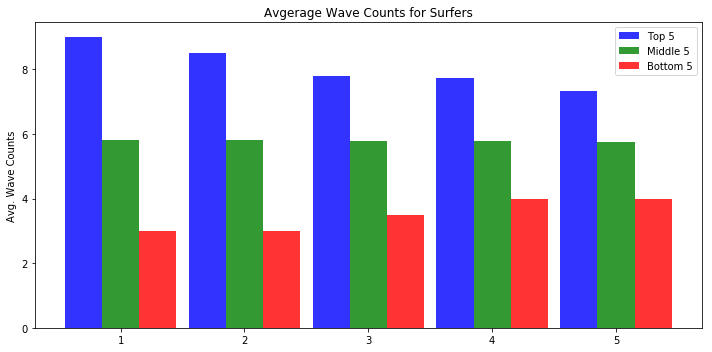

In [5]:
size = len(countAvg)   # find the size of the dictionary
mp = int(size/2)   # find the midpoint of the dictionary

# create 3 separate dictionaries holding the top, middle, and bottom 5 avg of wave count for all surfers
top5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=True)[:5])
middle5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=True)[mp-2:mp+3])
bottom5Avg = dict(sorted(countAvg.items(), key=operator.itemgetter(1), reverse=False)[:5])

# build the bar graph to display the dictionaries created above
plt.rcParams["figure.figsize"] = [10,5]
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, list(top5Avg.values()), bar_width,
alpha=opacity,
color='b',
label='Top 5')

rects2 = plt.bar(index + bar_width, list(middle5Avg.values()), bar_width,
alpha=opacity,
color='g',
label='Middle 5')

rects3 = plt.bar(index + bar_width*2, list(bottom5Avg.values()), bar_width,
alpha=opacity,
color='r',
label='Bottom 5')

plt.ylabel('Avg. Wave Counts')
plt.title('Avgerage Wave Counts for Surfers')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

The bar graph above is showing the spread of between the top 5 surfers with the highest average wave count, the middle 5 surfers average wave count and the bottom 5 surfers with the lowest average wave count. From this graph we can see very few surfers average more than 8 waves per heat. The first 2 groupings show a large spread between the highest average wave count and the lowest average wave count. However, even by the 5 grouping, the averages are begining to converge.

Even though the convergence may seem to show that a majority of surfers average arond the same number of waves per heat, this is a very broad overview of the data. We will continue to dive deeper in the data to try and learn more.

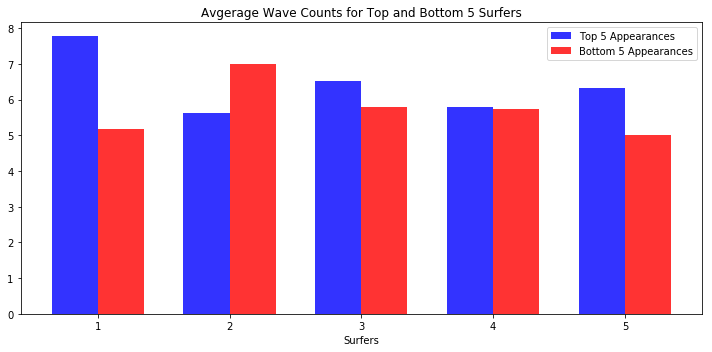

In [6]:
# filter down the dataframe so that it only contains later rounds and count the number of occurances for each surfer
# in these later rounds
laterRounds = df2[(df2.Round == 'Quarterfinals') | (df2.Round == 'Semifinals') | (df2.Round == 'Finals')].groupby(['Name']).count()
apperances = {}

# create a dictionary with surfer name as key and number of later round appearances as value
for i, row in laterRounds.iterrows():
    apperances[i] = row['Year']

# get the average wave count for the 5 surfers with the most later round appearances and the 
# least later round appearances
top5Appear = dict(sorted(apperances.items(), key=operator.itemgetter(1), reverse=True)[:5])
avgTopWaveCount = []
for s in top5Appear:
    avgTopWaveCount.append(countAvg[s])
    
bottom5Appear = dict(sorted(apperances.items(), key=operator.itemgetter(1), reverse=False)[:5])
avgBottomWaveCount = []
for s in bottom5Appear:
    avgBottomWaveCount.append(countAvg[s])
    
# create a graph to compare these average wave counts
plt.rcParams["figure.figsize"] = [10,5]
n_groups = 5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, avgTopWaveCount, bar_width,
alpha=opacity,
color='b',
label='Top 5 Appearances')

rects2 = plt.bar(index + bar_width, avgBottomWaveCount, bar_width,
alpha=opacity,
color='r',
label='Bottom 5 Appearances')

plt.xlabel('Surfers')
plt.title('Avgerage Wave Counts for Top and Bottom 5 Surfers')
plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

The above graph compares the average wave counts between the 5 surfers with the most numbers of appearances in later rounds (Quarterfinals, Semifinals, and Finals) and the 5 surfers with the least number of appearances in later rounds.

Looking at the graph, beside the second group, the surfers how make more later rounds have a higher average wave count. However, the averages are similar too one another, showing that just average wave count may not be the main indicator for how well a surfer will do in an event. Now we will begin to look further into what might allow one surfer to succeed over another.

To start out, we're going to look at how the top performing surfers wave score averages change in relation to the heat they are surfing in.

In [7]:
# get list of the 5 surfers who had the most number of finals appearances
top5Finals = df2[(df2.Round == 'Finals')].groupby(['Name']).count().sort_values('Year').index[-5:].tolist()

# this dictionary will hold the average score for a surfer for each round
# the key will be the surfers name
# the value will be represented as follows: [('round name', score), ('round name', score), ...]
avgRoundScores = {}
avgRoundWaveCount = {}

for s in top5Finals:
    scoreAvg = df2[(df2.Name == s)].groupby(['Round']).mean()   # get the mean score for each round
    roundList = []
    countList = []

    # because the dataframe lists the rounds out of order, some reodering must be done while creating the list
    for i, row in scoreAvg.iterrows():
        t = (i, row['Avg.-Score'])
        t2 = (i, row['Wave-Count'])

        if (i == 'Finals'):
            roundList.append(t)
            countList.append(t2)
        elif (i == 'Quarterfinals'):
            roundList.insert(0, t)
            countList.insert(0, t2)
        elif (i == 'Round 1'):
            roundList.insert(0, t)
            countList.insert(0, t2)
        elif (i == 'Round 2'):
            roundList.insert(1, t)
            countList.insert(1, t2)
        elif (i == 'Round 3'):
            roundList.insert(2, t)
            countList.insert(2, t2)
        elif (i == 'Round 4'):
            roundList.insert(3, t)
            countList.insert(3, t2)
        elif (i == 'Round 5'):
            roundList.insert(4, t)
            countList.insert(4, t2)
        elif (i == 'Semifinals'):
            roundList.insert(6, t)
            countList.insert(6, t2)
    
    avgRoundScores[s] = roundList   # add to the dictionary
    avgRoundWaveCount[s] = countList

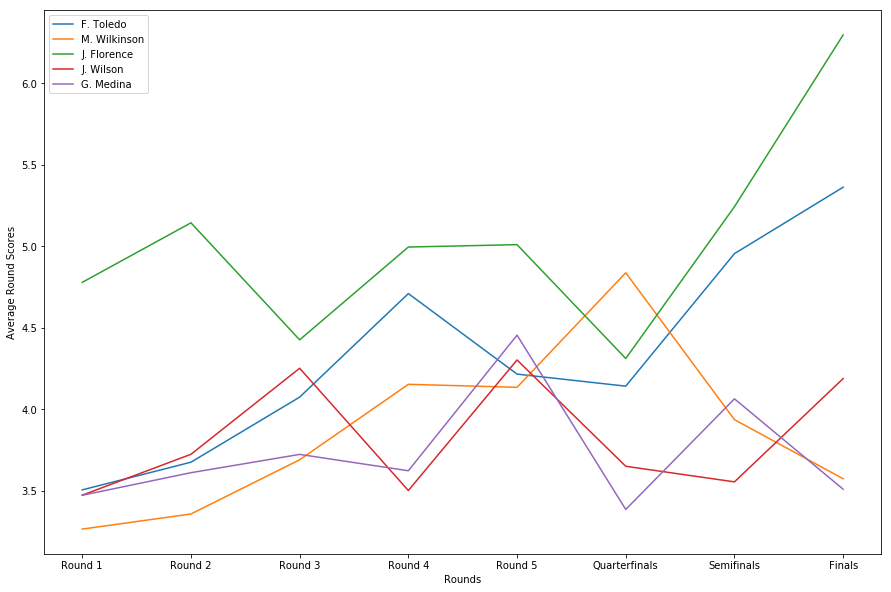

In [8]:
# creat line graph of surfers average scores
plt.rcParams["figure.figsize"] = [15,10]
xAxisTicks = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Quarterfinals', 'Semifinals', 'Finals']

for s in top5Finals:
    scores = []
    values = avgRoundScores[s]   # collect value for that key
    
    for v in values:
        scores.append(v[1])
    
    plt.plot(xAxisTicks, scores, label=s)
    
plt.ylabel('Average Round Scores')
plt.xlabel('Rounds')
plt.legend()
plt.show()

This graph shows how the 5 surfers with the most number of finals appearances average round score for each of the eight rounds. From the graph we can see that while some of these surfers will begin to improve there average scores in later round heats, others may being to perform poorly.

We can see for example that John John Florence on average really begins to preform well once he hits the quarterfinals, which is the same with Filipe Toledo. However Matt Wilkinson can be seen to build up to the quarterfinals, but then fall back down in his average scores.

To try and analize this further, we will now graph both the average round score and the average wave count for each round for the same 5 surfers and see what we can determine from this.

<IPython.core.display.Javascript object>


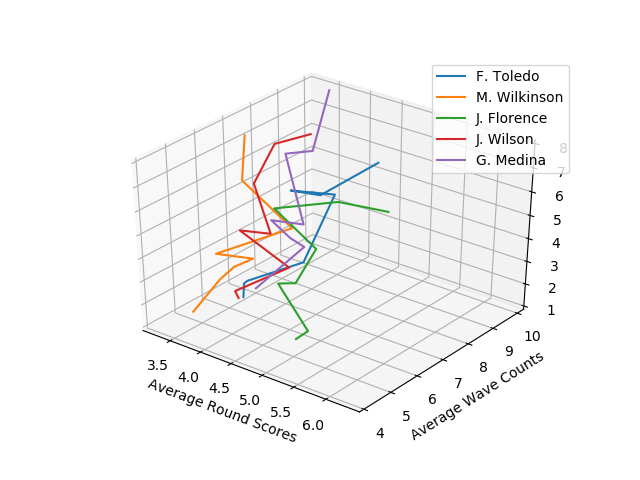

In [9]:
# allow graph to be interactive
%matplotlib notebook

# create the 3D grpah
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in top5Finals:
    scores = []
    counts = []
    scoreValues = avgRoundScores[s]   # collect value for that key
    waveValues = avgRoundWaveCount[s]
    
    for v in scoreValues:
        scores.append(v[1])
    
    for w in waveValues:
        counts.append(w[1])
    
    X = scores
    Y = counts
    Z = [1, 2, 3, 4, 5, 6, 7, 8]
    
    Z = np.array(Z)
    ax.plot3D(X, Y, Z, label=s)

plt.xlabel('Average Round Scores')
plt.ylabel('Average Wave Counts')
plt.legend()
plt.show()

Graphing both the average wave count and score for each round together allows us to see whether or not any of the surfers become more of less selective throughout the events. With further analysis however, there does not seem to be much consistancy between the group of surfers or for each surfer individually.

Let's change what we're looking at for a bit now. We will continue to look at these 5 surfers with the most number of finals appearances, but now we're going to factor in location.

First, lets get a list of all the events that have been run in the past 3 years. This will just allow for a visual representation all the events.

In [18]:
locs = df2.Event.unique()   # collect all the event locations
display(locs)

array(['Quiksilver Pro Gold Coast', 'Rip Curl Pro Bells Beach',
       'Drug Aware Margaret River Pro', 'Oi Rio Pro', 'Fiji Pro',
       'J-Bay Open', 'Billabong Pro Tahiti', 'Hurley Pro at Trestles',
       'Quiksilver Pro France', 'MEO Rip Curl Pro Portugal',
       'Billabong Pipe Masters', 'Outerknown Fiji Pro',
       'Corona Open J-Bay', 'Corona Bali Protected',
       'Uluwatu CT/ Margaret River Pro', "Corona Open J-Bay - Men's",
       "Tahiti Pro Teahupo'o"], dtype=object)

In [38]:
pd.set_option('display.max_rows', None)
top5DF = df2[df2.Name.isin(top5Finals)]   # create a new df by filtering out the top 5 surfers from the original df
events_pivot = pd.pivot_table(top5DF, index=['Name', 'Event'], values=['Avg.-Score', 'Wave-Count'], aggfunc=np.mean)
display(events_pivot)

Avg.-Score  Wave-Count
Name         Event                                                 
F. Toledo    Billabong Pipe Masters            2.993333    4.888889
             Billabong Pro Tahiti              2.605000    4.250000
             Corona Bali Protected             3.192000    7.800000
             Corona Open J-Bay                 5.121429    5.000000
             Corona Open J-Bay - Men's         5.420000    5.833333
             Drug Aware Margaret River Pro     4.627143    5.857143
             Fiji Pro                          3.985000    4.500000
             Hurley Pro at Trestles            5.558182    6.000000
             J-Bay Open                        4.433333    6.000000
             MEO Rip Curl Pro Portugal         3.505000    7.000000
             Oi Rio Pro                        3.173333    7.833333
             Quiksilver Pro France             3.240000    8.300000
             Quiksilver Pro Gold Coast         4.065455    6.909091
             Rip Curl Pro Bells Beach          5.611250    4.625000
             Tahiti Pro Teahupo'o              4.016000    5.600000
             Uluwatu CT/ Margaret River Pro    2.930000    7.750000
G. Medina    Billabong Pipe Masters            3.842857    6.357143
             Billabong Pro Tahiti              4.436154    6.461538
             Corona Bali Protected             3.300000    5.666667
             Corona Open J-Bay                 5.234000    5.800000
             Corona Open J-Bay - Men's         4.250000    6.250000
             Drug Aware Margaret River Pro     3.591667    5.500000
             Fiji Pro                          2.742857   10.857143
             Hurley Pro at Trestles            4.152500    7.500000
             J-Bay Open                        3.820000    8.000000
             MEO Rip Curl Pro Portugal         2.970667    9.533333
             Oi Rio Pro                        3.187333    9.333333
             Outerknown Fiji Pro               3.405000    7.000000
             Quiksilver Pro France             3.601176    9.411765
             Quiksilver Pro Gold Coast         3.744000    7.800000
             Rip Curl Pro Bells Beach          4.338889    5.111111
             Tahiti Pro Teahupo'o              3.118333    6.833333
             Uluwatu CT/ Margaret River Pro    2.772500    9.000000
J. Florence  Billabong Pipe Masters            4.014000    5.700000
             Billabong Pro Tahiti              5.368182    4.909091
             Corona Bali Protected             4.630000    6.000000
             Corona Open J-Bay                 6.532000    5.000000
             Drug Aware Margaret River Pro     6.427500    5.750000
             Fiji Pro                          4.084000    6.200000
             Hurley Pro at Trestles            5.811250    4.125000
             J-Bay Open                        5.690000    4.285714
             MEO Rip Curl Pro Portugal         4.403636    5.636364
             Oi Rio Pro                        4.240769    6.692308
             Outerknown Fiji Pro               3.685000    6.000000
             Quiksilver Pro France             4.410000    7.272727
             Quiksilver Pro Gold Coast         4.282500    5.916667
             Rip Curl Pro Bells Beach          4.802222    5.444444
             Uluwatu CT/ Margaret River Pro    2.615000    2.500000
J. Wilson    Billabong Pipe Masters            2.332143    6.571429
             Billabong Pro Tahiti              4.647500    4.583333
             Corona Bali Protected             2.725000    7.500000
             Corona Open J-Bay                 4.484286    6.142857
             Corona Open J-Bay - Men's         4.392000    6.000000
             Drug Aware Margaret River Pro     4.782727    6.454545
             Fiji Pro                          3.995000    3.000000
             Hurley Pro at Trestles            5.466667    5.166667
             J-Bay Open                        5.710000    5.200000
             MEO Rip Curl Pro Por